In [1]:
#importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #operating system dependent modules of Python
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline
import itertools
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading time series data of chicago 
data_complete=pd.read_csv("D://Taxi_Trips.csv.fdmdownload", nrows=20000000)

In [3]:
#features present in taxi fare data
data_complete.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [5]:
#getting first hand idea of the data
data_complete.describe()

Trip Seconds    Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
count  1.628003e+07  1.628105e+07         1.201806e+07          1.192147e+07   
mean   7.997748e+02  3.497085e+00         1.703138e+10          1.703136e+10   
std    1.036150e+03  5.521356e+00         3.434064e+05          3.339522e+05   
min    0.000000e+00  0.000000e+00         1.703101e+10          1.703101e+10   
25%    3.570000e+02  7.000000e-01         1.703108e+10          1.703108e+10   
50%    5.610000e+02  1.400000e+00         1.703128e+10          1.703128e+10   
75%    9.600000e+02  3.400000e+00         1.703184e+10          1.703183e+10   
max    8.635500e+04  1.870000e+03         1.703198e+10          1.703198e+10   

       Pickup Community Area  Dropoff Community Area          Fare  \
count           1.627869e+07            1.587400e+07  1.628072e+07   
mean            2.403175e+01            2.202636e+01  1.290479e+01   
std             1.977851e+01            1.783219e+01  3.812855e+01   
min             1.000000e+00            1.000000e+00  0.000000e+00   
25%             8.000000e+00            8.000000e+00  6.000000e+00   
50%             2.400000e+01            2.200000e+01  8.000000e+00   
75%             3.200000e+01            3.200000e+01  1.325000e+01   
max             7.700000e+01            7.700000e+01  9.900280e+03   

               Tips         Tolls        Extras    Trip Total  \
count  1.628072e+07  8.943330e+06  1.628072e+07  1.628072e+07   
mean   1.418779e+00  3.289088e-03  9.504636e-01  1.532688e+01   
std    2.633587e+00  5.728440e-01  1.258253e+01  4.108625e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  7.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  9.500000e+00   
75%    2.000000e+00  0.000000e+00  1.000000e+00  1.505000e+01   
max    8.810000e+02  1.024990e+03  8.889880e+03  9.975320e+03   

       Pickup Centroid Latitude  Pickup Centroid Longitude  \
count              1.628129e+07               1.628129e+07   
mean               4.190040e+01              -8.765956e+01   
std                3.885633e-02               7.283352e-02   
min                4.165022e+01              -8.791362e+01   
25%                4.188099e+01              -8.765588e+01   
50%                4.189207e+01              -8.763275e+01   
75%                4.190603e+01              -8.762621e+01   
max                4.202122e+01              -8.752995e+01   

       Dropoff Centroid Latitude  Dropoff Centroid Longitude  
count               1.591927e+07                1.591927e+07  
mean                4.190036e+01               -8.765435e+01  
std                 3.853158e-02                5.989566e-02  
min                 4.165022e+01               -8.791362e+01  
25%                 4.188099e+01               -8.765600e+01  
50%                 4.189251e+01               -8.763275e+01  
75%                 4.191462e+01               -8.762621e+01  
max                 4.202122e+01               -8.752995e+01

In [4]:
#extracting useful features from the data
data=data_complete.drop(columns=['Trip ID','Taxi ID','Pickup Census Tract','Dropoff Census Tract','Pickup Centroid Location','Dropoff Centroid  Location'])

In [5]:
#Date Manipulation extracting date,month,year
data["Trip Start Timestamp"]=data["Trip Start Timestamp"].apply(lambda row: row.replace(' ','/'))
data["Trip Start Timestamp"]=data["Trip Start Timestamp"].apply(lambda row: row.replace('-','/'))
data["Tripstart_month"]=data["Trip Start Timestamp"].apply(lambda row: row.split('/')[0])
data["Tripstart_year"]=data["Trip Start Timestamp"].apply(lambda row: row.split('/')[2])
data["Tripstart_day"]=data["Trip Start Timestamp"].apply(lambda row: row.split('/')[1])

#merging date to form date time object
data['Tripstart_time']=pd.to_datetime(data['Tripstart_year']+data['Tripstart_month']+data['Tripstart_day'],format='%Y%m%d')


In [7]:
#calculating missing values for each feature
data.isnull().sum()

Trip Start Timestamp                0
Trip End Timestamp                191
Trip Seconds                        0
Trip Miles                          0
Pickup Community Area            2600
Dropoff Community Area         407293
Fare                              570
Tips                              570
Tolls                         7337958
Extras                            570
Trip Total                          0
Payment Type                        0
Company                         14384
Pickup Centroid Latitude            0
Pickup Centroid Longitude           0
Dropoff Centroid Latitude      362015
Dropoff Centroid Longitude     362015
Tripstart_month                     0
Tripstart_year                      0
Tripstart_day                       0
Tripstart_time                      0
dtype: int64

In [6]:
#filling missing values of fares

#First filling missing values in trip time based on avg trip time
avg_triptime=data['Trip Seconds'].mean()
data['Trip Seconds'].fillna(avg_triptime, inplace= True)

#filling trip miles based on avg distance
avg_speed = data['Trip Miles'].div(data['Trip Seconds']).replace([np.inf, -np.inf], np.nan).mean()
data['Trip Miles'].fillna(avg_speed * data['Trip Seconds'], inplace=True)

#filling fare based on average cost
avg_mon = data['Trip Total'].div(data['Trip Seconds']).replace([np.inf, -np.inf], np.nan).mean()
data['Trip Total'].fillna(avg_mon * data['Trip Miles'], inplace=True)


In [11]:
data.columns

Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Community Area', 'Dropoff Community Area', 'Fare',
       'Tips', 'Tolls', 'Extras', 'Trip Total', 'Payment Type', 'Company',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Tripstart_month', 'Tripstart_year', 'Tripstart_day', 'Tripstart_time'],
      dtype='object')

In [8]:
data=data[data['Trip Total']!=0]

In [9]:
data=data[data['Trip Miles']!=0]

In [10]:
#variable summary
summary = data.describe().transpose().reset_index().rename(columns = {"index" : 
                                                                          "variable"})
summary  = np.around(summary,2)

var_lst = [summary["variable"],summary["count"],summary['mean'],summary['std'],
           summary["min"],summary["25%"],summary["50%"],summary["75%"],summary["max"]]

table = go.Table(header = dict(values = summary.columns.tolist(),
                               line = dict(color = ['#506784']),
                               fill = dict(color = ['#119DFF']),
                              ),
                 cells  = dict(values = var_lst,
                               line = dict(color = ['#506784']),
                               fill = dict(color = ["lightgrey",'#F5F8FF']),
                              ),
                 columnwidth = [130,80,80,80,80,80,80,80,80])
                
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[table],layout=layout)
py.iplot(figure)

In [ ]:
# Distribuion plots for numerical features

cols = ['Trip Total','Pickup Centroid Longitude', 'Dropoff Centroid Longitude','Pickup Centroid Latitude', 'Dropoff Centroid Latitude']

length=len(cols)

cs     = [(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
          (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
          (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
          (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
          (1.0, 0.4980392156862745, 0.0),"b"]

sns.set_style("darkgrid")
plt.figure(figsize = (13,15))
for i,j,k in itertools.zip_longest(cols,range(length),cs) :
    plt.subplot(length/2,length/3,j+1)
    sns.distplot(data[i],color = k)
    plt.axvline(data[i].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "k" ,
                label = "Mean")
    plt.legend(loc = "best")
    plt.title(i,color = "b")
    plt.xlabel("")



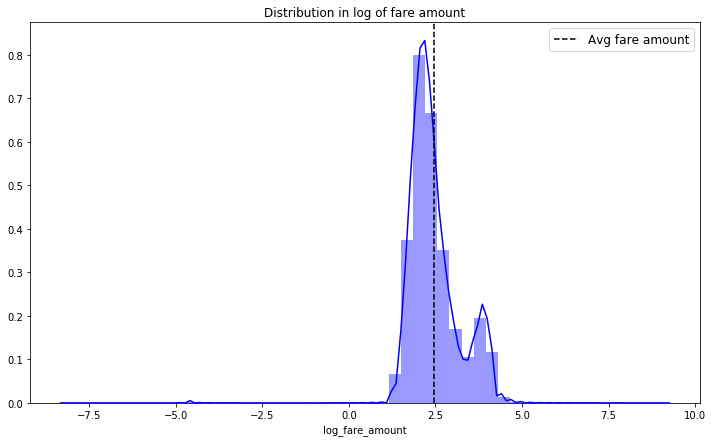

In [11]:
# Distribution of log fare amount

data['log_fare_amount']=np.log(data['Trip Total'])
plt.figure(figsize = (12,7))
sns.distplot(data["log_fare_amount"],color = "b")
plt.axvline(data["log_fare_amount"].mean(),color = "k",
            linestyle = "dashed",label = "Avg fare amount")
plt.title("Distribution in log of fare amount")
plt.legend(loc = "best",prop = {"size" : 12})
plt.show()

<Figure size 864x504 with 0 Axes>

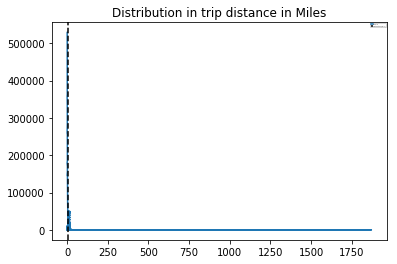

In [12]:
# Distribution of distance in miles
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
# axes=plt.gca()
# axes.set_xlim([0,10])
# axes.set_ylim([0,750])
fig, ax = plt.subplots()
# data['Trip Miles'].value_counts().plot(ax=ax, kind='bar')
plt.plot(data["Trip Miles"].value_counts())
plt.axvline(data["Trip Miles"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip distance (Miles)")
plt.title("Distribution in trip distance in Miles")
plt.legend(loc = "best",prop = {"size" : 1})
plt.show()

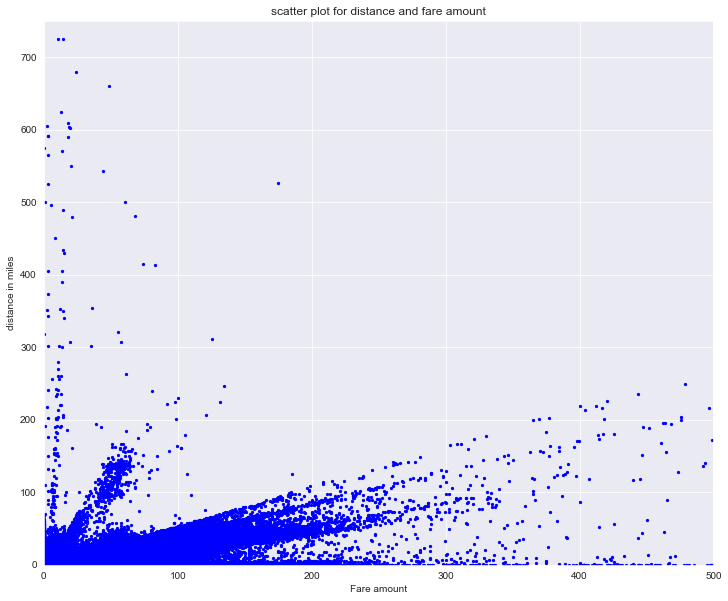

In [29]:
# Scatter plot for distance and fare amount

plt.figure(figsize = (12,10))
axes=plt.gca()
plt.scatter(data["Trip Total"],
            data["Trip Miles"],s = 5,
            linewidths=1, c = "b")
plt.ylabel("distance in miles")
plt.xlabel("Fare amount")
plt.title("scatter plot for distance and fare amount")
axes.set_xlim([0,500])
axes.set_ylim([0,750])
plt.show()

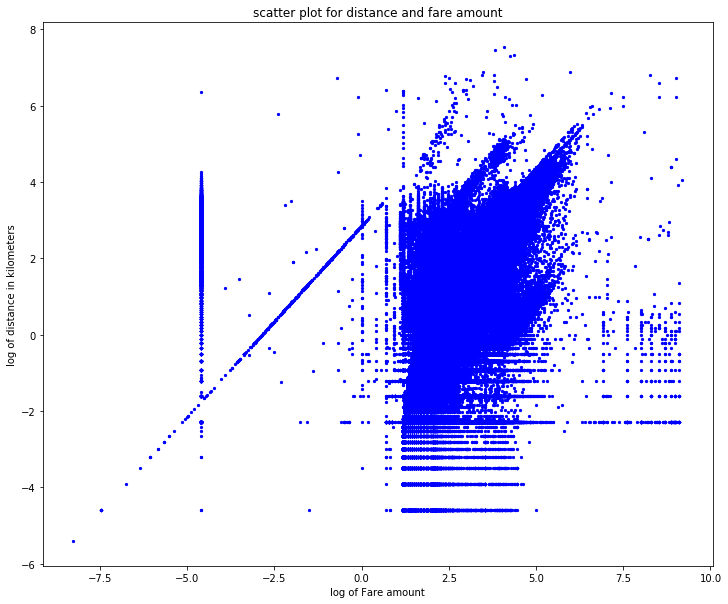

In [13]:
# Scatter plot of log of distance vs log of fare amount

data['log_trip_distance']=np.log(data['Trip Miles'])
plt.figure(figsize = (12,10))
plt.scatter(data["log_fare_amount"],
            data["log_trip_distance"],s = 5,
            linewidths=1, c = "b")
plt.ylabel("log of distance in kilometers")
plt.xlabel("log of Fare amount")
plt.title("scatter plot for distance and fare amount")
plt.show()

In [16]:
# Total Trips and fare amount by each year

yearly_analysis  = data.groupby("Tripstart_year").agg({"Trip Start Timestamp":"count","Trip Total":"sum","Trip Miles" : "sum"}).reset_index()
#aggregating by year
yearly_analysis = yearly_analysis.rename(columns = {"Trip Start Timestamp" : "trip_count"})

def plotting(column) : 
    tracer = go.Bar(x= yearly_analysis["Tripstart_year"],y = yearly_analysis[column],
                    marker = dict(line = dict(width = 1)),
                    name = column
                   )
    return tracer

#layout
layout = go.Layout(dict(title = "Total  trips,trip_distance and fare amount by year",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "year",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
    
data_new = [plotting("trip_count"),plotting("Trip Miles"),plotting("Trip Total")]
fig  = go.Figure(data=data_new,layout=layout)
py.iplot(fig)

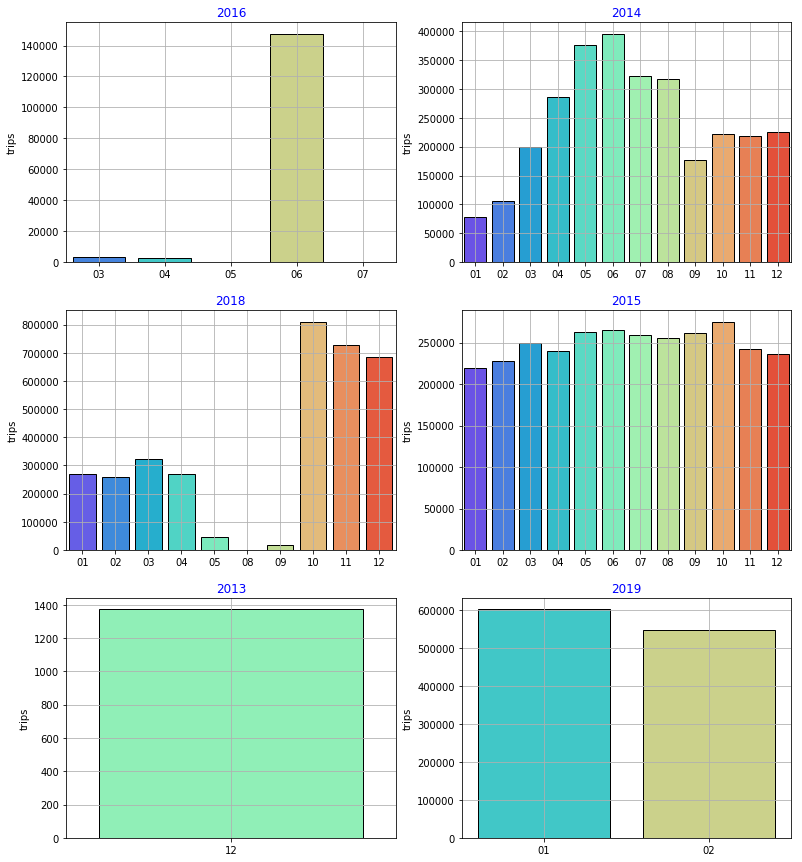

In [30]:
# Trend in Trip by months

yrs = [i for i in data["Tripstart_year"].unique().tolist()]
yrs=yrs[1:]

#subset data without year 2015
complete_dat = data[data["Tripstart_year"].isin(yrs)]
# length_years=len(yrs)-1

plt.figure(figsize = (13,15))
for i,j in itertools.zip_longest(yrs,range(len(yrs))):
    plt.subplot(3,2,j+1)
    trip_counts_mn = complete_dat[complete_dat["Tripstart_year"] == i]["Tripstart_month"].value_counts()
    trip_counts_mn = trip_counts_mn.reset_index()
    sns.barplot(trip_counts_mn["index"],trip_counts_mn["Tripstart_month"],
                palette = "rainbow",linewidth = 1,
                edgecolor = "k"*complete_dat["Tripstart_month"].nunique() 
               )
    plt.title(i,color = "b",fontsize = 12)
    plt.grid(True)
    plt.xlabel("")
    plt.ylabel("trips")

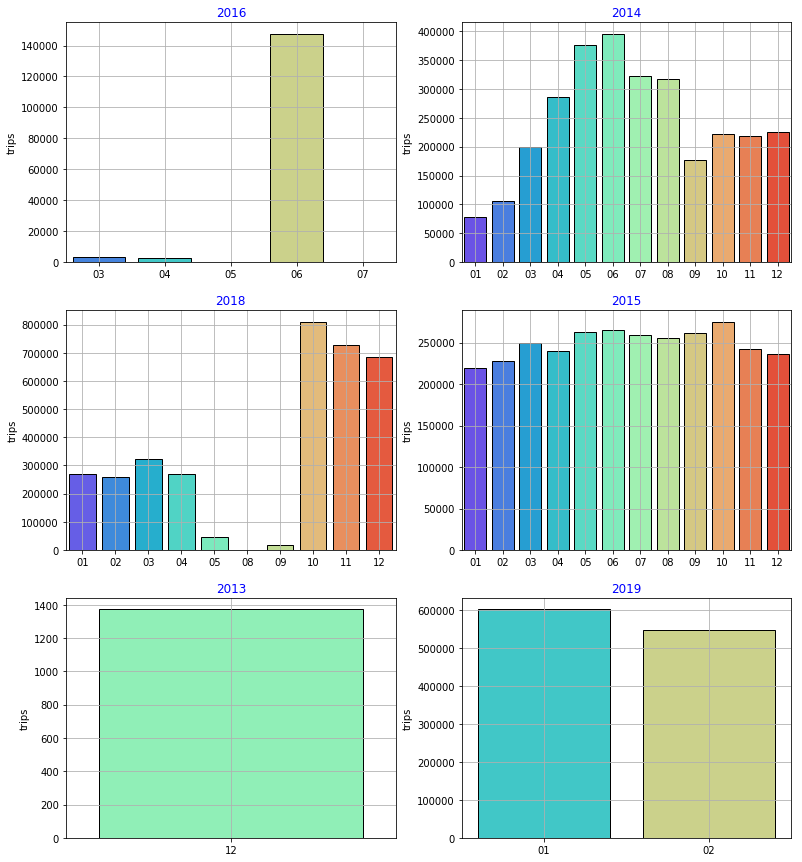

In [33]:
# Trend in Trip by months

yrs = [i for i in data["Tripstart_year"].unique().tolist()]
yrs=yrs[1:]
complete_dat = data[data["Tripstart_year"].isin(yrs)]


plt.figure(figsize = (13,15))
for i,j in itertools.zip_longest(yrs,range(len(yrs))) :
    plt.subplot(3,2,j+1)
    trip_counts_mn = complete_dat[complete_dat["Tripstart_year"] == i]["Tripstart_month"].value_counts()
    trip_counts_mn = trip_counts_mn.reset_index()
    sns.barplot(trip_counts_mn["index"],trip_counts_mn["Tripstart_month"],
                palette = "rainbow",linewidth = 1,
                edgecolor = "k"*complete_dat["Tripstart_month"].nunique() 
               )
    plt.title(i,color = "b",fontsize = 12)
    plt.grid(True)
    plt.xlabel("")
    plt.ylabel("trips")

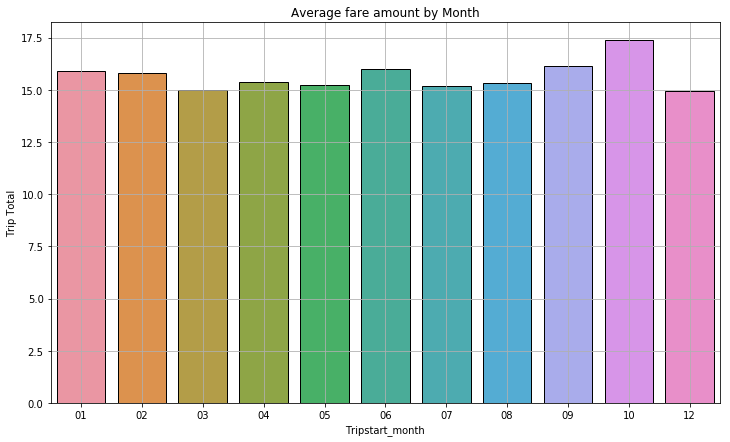

In [39]:
# Avergae fare amount by month

fare_mn = data.groupby("Tripstart_month")["Trip Total"].mean().reset_index()

mnth_ord = ['01','02','03','04','05','06','07','08','09','10','12']

plt.figure(figsize = (12,7))
sns.barplot("Tripstart_month","Trip Total",
            data = fare_mn,order = mnth_ord,
            linewidth =1,edgecolor = "k"*len(mnth_ord)
           )
plt.grid(True)
plt.title("Average fare amount by Month")
plt.show()


In [ ]:
# Seasonal Trend in trips, passengers and fare amount
data['month_year']=data['Tripstart_month'].map(str)+'-'+data['Tripstart_year'].map(str)

#aggregate by year-month(trips)
trip_count = data.groupby(["Tripstart_year","Tripstart_month"])["month_year"].value_counts().to_frame()
trip_count.columns = ["count"]
trip_count = trip_count.reset_index()

#aggregate by year-month(fare amount)
total_fare = (data.groupby(["Tripstart_year","Tripstart_month","month_year"])["Trip Total"].sum().reset_index())

#aggregate by year-month(total trip distance)
total_trip_dist = (data.groupby(["Tripstart_year","Tripstart_month","month_year"])["Trip Miles"].sum().reset_index())


#plotting
def trend_scatter(data_frame,column) :
    tracer = go.Scatter(x = data_frame["month_year"],y = data_frame[column],
                        mode = "lines+markers",
                        marker = dict(color = data_frame["Tripstart_month"],size = 7,
                                      colorscale = "Picnic",
                                      line = dict(width =1 ,color = "black")
                                     ),
                        line = dict(color = "grey" ),
                   )
    return tracer

def layout_plot(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "count",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            margin = dict(b = 100)
                           )
                      )
    return layout

#figure 1
data    = [trend_scatter(trip_count,"count")]
layout  = layout_plot("Trend in trip count from 2014-Jan to 2019-May")
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

#figure 2
data2    = [trend_scatter(total_fare,"fare_amount")]
layout2  = layout_plot("Trend in total fare amount from 2014-Jan to 2019-May")
fig2 = go.Figure(data = data2,layout = layout2)
py.iplot(fig2)

#figure 3
data3    = [trend_scatter(total_trip_dist,"trip_distance_km")]
layout3  = layout_plot("Trend in trip distance from 2014-Jan to 2019-May")
fig3 = go.Figure(data = data3,layout = layout3)
py.iplot(fig3)

In [67]:
#Correlation Matrix

#Merge passenger_count,trip_count and fare_amount data 
trip_count=data.groupby('month_year').count()
total_fare=data.groupby('month_year')['Trip Total'].agg(['sum'])
merge1  = trip_count.merge(total_fare,left_on = "month_year",
                           right_on = "month_year",how= "left")

merge2  = data.groupby('month_year')['Trip Miles'].agg(['sum'])

final_my_dat = merge1.merge(merge2,left_on = "month_year",
                           right_on = "month_year",how= "left")


final_my_dat = final_my_dat[["Trip Start Timestamp","sum_x","sum_y"]]

# #correlation
corr  =  np.array(final_my_dat.corr())
corr  =  np.around(corr,3)

# #x & y ticks
ticks =  ['count', 'Trip Total', "Trip Miles"]

# #plot heatmap
fig = ff.create_annotated_heatmap(z = corr,x = ticks,y = ticks,showscale=True,
                                   colorscale = "Portland",
                                   colorbar   = dict(title = "correlation coefficient",
                                                     titleside = "right"
                                      ) 
                                  )
fig.layout.title  = "Correlation Matrix"
fig.layout.margin = dict(l = 200,r = 200)
py.iplot(fig)


In [70]:
# HEAT MAP
def plot_heat_map(column,aggregate_function,title) :
    #pivot table 
    pivot_table = pd.pivot_table(data = data,columns="Tripstart_month",index = "Tripstart_year",
                                values = column,aggfunc = aggregate_function)
    
    mnth_ord = ['01','02','03','04','05','06','07','08','09','10','11','12']
    
    #reverse mnth order list
    def reverse(data_list) :
        return data_list[::-1]
    
    mnth_ord_rev = reverse(mnth_ord)
    
    pivot_table  = pivot_table[mnth_ord_rev].sort_values(by = "Tripstart_year",ascending = True)
    pivot_table  = pivot_table.transpose()
    
    #convert array
    pivot_array  = np.around(np.array(pivot_table))
    
    #color scale
    colorscale=[[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255, 255, 153)'], 
                [.4, 'rgb(153, 255, 204)'], [.6, 'rgb(179, 217, 255)'], 
                [.8, 'rgb(240, 179, 255)'],[1.0, 'rgb(255, 77, 148)']]
    #plot heat map
    figure = ff.create_annotated_heatmap(z = pivot_array,
                                         x = pivot_table.columns.tolist(),
                                         y = pivot_table.index.tolist(),
                                         font_colors = ["black"],
                                         showscale = True,
                                         colorscale = colorscale,
                                         colorbar   = dict(title = "total " + title,
                                                           titleside = "right")
                                        )
    #title
    figure.layout.title = "Total " + title + " by  month - year ."
    figure.layout.plot_bgcolor  = "white"
    figure.layout.paper_bgcolor = "white"
    
    return py.iplot(figure)

#plot1
plot_heat_map("Tripstart_time","count","trip count")
# #plot2
# plot_heat_map("passenger_count","sum","passengers count")
#plot3
plot_heat_map("Fare","sum","Fare")
#plot4
plot_heat_map("Trip Miles","sum","Trip Miles")


In [85]:
### Time Series forecasting of Fare Amount

import datetime
#Data - total fare amount by month from 2009 to 2015-06
ts_fare = (data.groupby(["Tripstart_year","Tripstart_month","Tripstart_day","Tripstart_time"])["Trip Total"].mean().reset_index())[["Tripstart_time","Trip Total"]]
# ts_fare["date"] = ts_fare["year"].astype(str) + "-" + ts_fare["month"].astype(str)
#selecting columns
#convert to date format
# ts_fare["date"] = pd.to_datetime(ts_fare["date"],format = "%Y-%m")
ts_fare.index   = ts_fare["Tripstart_time"]
ts_fare = ts_fare.drop(columns  = ["Tripstart_time"],axis = 1)
ts_fare.head(10)

### Visualizing Time Series

trace = go.Scatter(x = ts_fare.index,y = ts_fare["Trip Total"],
                   mode = "lines+markers",
                   marker = dict(color = "royalblue",line = dict(width =1))
                  )
layout = go.Layout(dict(title = "Visualizing time series",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [88]:
### Check Stationarity of Time Series

from statsmodels.tsa.stattools import adfuller

def plot_line(x,y,color,name) :
    tracer = go.Scatter(x = x,y = y,mode = "lines",
                        marker = dict(color = color,
                                      line = dict(width =1)),
                       name = name)
    return tracer

def plot_layout(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                            zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
    return layout


def stationary_test(timeseries) :
    #rolling mean
    rol_mean = timeseries["Trip Total"].rolling(window = 12,
                                                 center = False).mean()
    #rolling standard deviation
    rol_std  = timeseries["Trip Total"].rolling(window = 12,
                                                 center = False).std()
    
    #plotting
    trace1  = plot_line(timeseries.index,timeseries["Trip Total"],
                        "blue","time_series")
    trace2  = plot_line(rol_mean.index,rol_mean.values,
                        "red","rolling_mean")
    trace3  = plot_line(rol_std.index,rol_std.values,
                        "green", "rolling_std")
    layout  = plot_layout("rolling mean and standard deviation for timeseries")
    figure  = go.Figure(data = [trace1,trace2,trace3],layout = layout)
    
    test_results = adfuller(timeseries["Trip Total"])
    res_list     = ["Test Statistic","p-value",
                    "lags used","no of observations"] 
    res_df = pd.Series(test_results[:4],index = res_list)
    
    for key,value in test_results[4].items() :
        res_df["Critical value (%s)"%key] = value 
        
    print ("Results - Dickey fuller test")
    print (res_df)
    return py.iplot(figure)

stationary_test(ts_fare)


Results - Dickey fuller test
Test Statistic            -5.636058
p-value                    0.000001
lags used                 18.000000
no of observations      1423.000000
Critical value (1%)       -3.434954
Critical value (5%)       -2.863573
Critical value (10%)      -2.567852
dtype: float64


# Elimating Trend

In [89]:


## Moving Average

#log of timeseries
log_ts_fare = np.log(ts_fare)

#rolling average of log timeseries
rol_avg_log_ts = log_ts_fare["Trip Total"].rolling(window = 12,center = False).mean()

#plotting log timeseries and rolling mean
t1 = plot_line(log_ts_fare.index,log_ts_fare["Trip Total"],
                "blue","log_time_series")
t2 = plot_line(rol_avg_log_ts.index,rol_avg_log_ts.values,
               "red","moving_average(log)")
lay = plot_layout("log time series and moving average")
fig = go.Figure(data = [t1,t2],layout = lay)
py.iplot(fig)

#difference
log_ts_fare_diff = log_ts_fare - rol_avg_log_ts.to_frame()
log_ts_fare_diff.dropna(inplace = True)
stationary_test(log_ts_fare_diff)



Results - Dickey fuller test
Test Statistic         -9.774604e+00
p-value                 6.988897e-17
lags used               2.400000e+01
no of observations      1.406000e+03
Critical value (1%)    -3.435010e+00
Critical value (5%)    -2.863598e+00
Critical value (10%)   -2.567866e+00
dtype: float64


In [90]:
### Exponential Weighted Moving Average

#exponential moving average of log time series
exp_log_avg = log_ts_fare["Trip Total"].ewm(halflife = 12).mean()

#plotting
t1 = plot_line(log_ts_fare.index,log_ts_fare["Trip Total"],
               "blue","log time series")
t2 = plot_line(exp_log_avg.index,exp_log_avg.values,
               "red","exponential avg")
lay = plot_layout("log time series and exponential moving average")
fig = go.Figure(data = [t1,t2],layout = lay)
py.iplot(fig)

#difference
exp_ts_diff = log_ts_fare - exp_log_avg.to_frame()
stationary_test(exp_ts_diff)

Results - Dickey fuller test
Test Statistic         -8.936648e+00
p-value                 9.494577e-15
lags used               2.400000e+01
no of observations      1.417000e+03
Critical value (1%)    -3.434973e+00
Critical value (5%)    -2.863582e+00
Critical value (10%)   -2.567857e+00
dtype: float64


In [98]:
ts_fare_diff = log_ts_fare - log_ts_fare.shift()

In [102]:
ts_fare_diff = log_ts_fare - log_ts_fare.shift()
ts_fare_diff.dropna(inplace = True)

#plotting
t1 = plot_line(ts_fare_diff.index,ts_fare_diff["Trip Total"],
              "blue","Differenced log series")
lay = plot_layout("Differenced log series")
fig = go.Figure(data = [t1],layout=lay)
py.iplot(fig)

#stationary test
stationary_test(ts_fare_diff)

Results - Dickey fuller test
Test Statistic         -8.998682e+00
p-value                 6.587452e-15
lags used               2.300000e+01
no of observations      1.417000e+03
Critical value (1%)    -3.434973e+00
Critical value (5%)    -2.863582e+00
Critical value (10%)   -2.567857e+00
dtype: float64


In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decompose
decompose = seasonal_decompose(log_ts_fare, freq=120)

#trend
trend       = decompose.trend
#seasonality
seasonality = decompose.seasonal
#residuals
residuals   = decompose.resid

#plotting
t1 = plot_line(ts_fare.index,ts_fare["Trip Total"],
               "blue","log_Series")
t2 = plot_line(trend.index,trend["Trip Total"],
               "green","Trend")
t3 = plot_line(seasonality.index,seasonality["Trip Total"],
               "red","Seasonality")
t4 = plot_line(residuals.index,residuals["Trip Total"],
               "black","Residuals")
#subplots
fig = tls.make_subplots(rows = 4,cols = 1,subplot_titles = ("log series",
                                                            "Trend",
                                                            "Seasonality",
                                                            "residuals"))

fig.append_trace(t1,1,1)
fig.append_trace(t2,2,1)
fig.append_trace(t3,3,1)
fig.append_trace(t4,4,1)
#layout
fig["layout"].update(height = 750,
                     plot_bgcolor  = "rgb(243,243,243)",
                     paper_bgcolor = "rgb(243,243,243)",
                     xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                  zerolinewidth=1,ticklen=5,gridwidth=2),
                    yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                 zerolinewidth=1,ticklen=5,gridwidth=2),
                    title = "decomposing"
                    )
py.iplot(fig)

#stationary tert for residuals
residuals.dropna(inplace = True)
stationary_test(residuals)

Results - Dickey fuller test
Test Statistic         -8.154227e+00
p-value                 9.515083e-13
lags used               2.200000e+01
no of observations      1.299000e+03
Critical value (1%)    -3.435394e+00
Critical value (5%)    -2.863768e+00
Critical value (10%)   -2.567956e+00
dtype: float64


In [77]:
mydata=data[data['Tripstart_time'].dt.year>2013][['Tripstart_time','Trip Total']]
usedata=mydata.groupby(['Tripstart_time'])['Trip Total'].mean().reset_index()
usedata=usedata.set_index('Tripstart_time')
usedata=usedata[usedata['Trip Total']!=0]
usedata=np.log(usedata)
ts_fare_diff = usedata - usedata.shift()
ts_fare_diff.dropna(inplace = True)

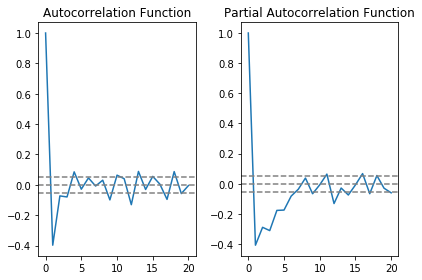

In [78]:
#PACF ACF Plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
ts_log_diff=ts_fare_diff
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf= pacf(ts_log_diff, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [108]:
# Fitting ARIMA Model on the data

usedata=mydata.groupby(['Tripstart_time'])['Trip Total'].mean().reset_index()
usedata=usedata.set_index('Tripstart_time')
usedata=usedata[usedata['Trip Total']!=0]
usedata=np.log(usedata)

ts_fare_diff = usedata - usedata.shift()
ts_fare_diff.dropna(inplace = True)

def plot_line(x,y,color,name) :
    tracer = go.Scatter(x = x,y = y,mode = "lines",
                        marker = dict(color = color,
                                      line = dict(width =1)),
                       name = name)
    return tracer

def plot_layout(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                            zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
    return layout

from statsmodels.tsa.arima_model import ARIMA
# global fitted_values
#ARIMA model
def arima_model(time_series,p,d,q) :
    arima_model   = ARIMA(time_series , order = (p,d,q))
    results_arima = arima_model.fit(disp = -1)
    fitted_values = results_arima.fittedvalues
    
    trace1 = plot_line(fitted_values.index,
                       fitted_values.values,
                       "blue","fitted values")
    
    trace2 = plot_line(ts_fare_diff.index,
                       ts_fare_diff["Trip Total"],
                       "red","log differenced values")

    layout = plot_layout(("ARIMA model p = " + str(p) + 
                          ", d = " + str(d) + ", q = " + str(q)))
    data  = [trace2,trace1]
    fig   = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
    print (results_arima.summary())
    return fitted_values



import warnings
warnings.filterwarnings("ignore")


In [109]:
fitted_values=arima_model(usedata,2,1,1)

                             ARIMA Model Results                              
Dep. Variable:           D.Trip Total   No. Observations:                 1440
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 177.169
Method:                       css-mle   S.D. of innovations              0.214
Date:                Tue, 12 Nov 2019   AIC                           -344.337
Time:                        05:16:10   BIC                           -317.975
Sample:                             1   HQIC                          -334.496
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0004      0.001      0.352      0.725      -0.002       0.003
ar.L1.D.Trip Total     0.0671      0.036      1.842      0.066      -0.004       0.138
ar.L2.D.Trip Total  